# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Riyan Zaenal Arifin
- **Email:** riyanzaenal411@gmail.com
- **ID Dicoding:** A327YBF437

## Menentukan Pertanyaan Bisnis

- Bagaimana demografi dari customer.?
- Kategori produk apa yang paling banyak dan paling sedikit dibeli oleh customer.?
- Produk apa yang paling banyak dan paling sedikit dibeli oleh customer.?
- Bagaimana performa dan revenue penjualan sepanjang tahun 2017.?
- Type Pembayaran apa yang paling banyak digunakan customer.?
- Bagaimana status orderan dari pelanggan?

Analisis Tambahan:
- RMF Parameters
- Geospatial Analysis
- Clustering customer (Manual by jumlah transaction)

## Import Semua Packages/Library yang Digunakan

In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geobr
import pkg_resources

## Data Wrangling

### Gathering Data

#### Buat untuk membuka file csv

In [193]:
def dataset(path):
    df = pd.read_csv(path)
    return df

#### Gunakan fungsi untuk membuka file csv

In [194]:
df_customers_dataset = dataset('/home/riyan/LaskarAi/Belajar Data Analisis Dengan Python/submission/data/customers_dataset.csv')
df_geolocation_dataset = dataset('/home/riyan/LaskarAi/Belajar Data Analisis Dengan Python/submission/data/geolocation_dataset.csv')
df_order_items_dataset = dataset('/home/riyan/LaskarAi/Belajar Data Analisis Dengan Python/submission/data/order_items_dataset.csv')
df_order_payments_dataset = dataset('/home/riyan/LaskarAi/Belajar Data Analisis Dengan Python/submission/data/order_payments_dataset.csv')
df_order_reviews_dataset = dataset('/home/riyan/LaskarAi/Belajar Data Analisis Dengan Python/submission/data/order_reviews_dataset.csv')
df_orders_dataset = dataset('/home/riyan/LaskarAi/Belajar Data Analisis Dengan Python/submission/data/orders_dataset.csv')
df_product_category_name_translation = dataset('/home/riyan/LaskarAi/Belajar Data Analisis Dengan Python/submission/data/product_category_name_translation.csv')
df_products_dataset = dataset('/home/riyan/LaskarAi/Belajar Data Analisis Dengan Python/submission/data/products_dataset.csv')
df_sellers_dataset = dataset('/home/riyan/LaskarAi/Belajar Data Analisis Dengan Python/submission/data/sellers_dataset.csv')

**Insight:**
- Hasil gabungan dataset disimpan dalam df_all dengan sebanyak 45 kolom/attribute
- Hasil gabungan dataset disimpan dalam df_all dengan sebanyak 1151824 baris

### Assessing Data

#### Missing Value 

##### Buat fungsi untuk melihat data missing

In [195]:
def missing_values(df):
    # Masukan nilai yang memungkinkan missing
    missing_values = ['', ' ', 'NaN', 'Nan', 'nan','NULL','Null','null','N/A','n/a', '.', ',','-','--','---', 'TIDAK ADA DATA', 'KOSONG']
    col_names = list(df.columns)
    df[col_names] = df[col_names].replace(missing_values, np.nan)

    # Hitung jumlah data yang kosong
    missing_values = df.isnull().sum()
    missing_values = pd.DataFrame(missing_values, columns=['count'])
    missing_values.reset_index(inplace=True)
    return missing_values

##### Missing value pada dataset df_customers_dataset

In [196]:
missing_values(df_customers_dataset)

,index,count
0,customer_id,0
1,customer_unique_id,0
2,customer_zip_code_prefix,0
3,customer_city,0
4,customer_state,0


##### Missing value pada dataset df_geolocation_dataset

In [197]:
missing_values(df_geolocation_dataset)

,index,count
0,geolocation_zip_code_prefix,0
1,geolocation_lat,0
2,geolocation_lng,0
3,geolocation_city,0
4,geolocation_state,0


##### Missing value pada dataset df_order_items_dataset

In [198]:
missing_values(df_order_items_dataset)

,index,count
0,order_id,0
1,order_item_id,0
2,product_id,0
3,seller_id,0
4,shipping_limit_date,0
5,price,0
6,freight_value,0


##### Missing value pada dataset df_order_payments_dataset

In [199]:
missing_values(df_order_payments_dataset)

,index,count
0,order_id,0
1,payment_sequential,0
2,payment_type,0
3,payment_installments,0
4,payment_value,0


##### Missing value pada dataset df_order_reviews_dataset

In [200]:
missing_values(df_order_reviews_dataset)

,index,count
0,review_id,0
1,order_id,0
2,review_score,0
3,review_comment_title,87670
4,review_comment_message,58311
5,review_creation_date,0
6,review_answer_timestamp,0


##### Missing value pada dataset df_orders_dataset

In [201]:
missing_values(df_orders_dataset)

,index,count
0,order_id,0
1,customer_id,0
2,order_status,0
3,order_purchase_timestamp,0
4,order_approved_at,160
5,order_delivered_carrier_date,1783
6,order_delivered_customer_date,2965
7,order_estimated_delivery_date,0


##### Missing value pada dataset df_product_category_name_translation

In [202]:
missing_values(df_product_category_name_translation)

,index,count
0,product_category_name,0
1,product_category_name_english,0


##### Missing value pada dataset df_products_dataset

In [203]:
missing_values(df_products_dataset)

,index,count
0,product_id,0
1,product_category_name,610
2,product_name_lenght,610
3,product_description_lenght,610
4,product_photos_qty,610
5,product_weight_g,2
6,product_length_cm,2
7,product_height_cm,2
8,product_width_cm,2


##### Missing value pada dataset df_sellers_dataset

In [204]:
missing_values(df_sellers_dataset)

,index,count
0,seller_id,0
1,seller_zip_code_prefix,0
2,seller_city,0
3,seller_state,0


### Data Duplikat

In [205]:
print("Jumlah duplikasi df_customers_dataset: ", df_customers_dataset.duplicated().sum())
print("Jumlah duplikasi df_geolocation_dataset: ", df_geolocation_dataset.duplicated().sum())
print("Jumlah duplikasi df_order_items_dataset: ", df_order_items_dataset.duplicated().sum())
print("Jumlah duplikasi df_order_payments_dataset: ", df_order_payments_dataset.duplicated().sum())
print("Jumlah duplikasi df_order_reviews_dataset: ", df_order_reviews_dataset.duplicated().sum())
print("Jumlah duplikasi df_orders_dataset: ", df_orders_dataset.duplicated().sum())
print("Jumlah duplikasi df_product_category_name_translation: ", df_product_category_name_translation.duplicated().sum())
print("Jumlah duplikasi df_products_dataset: ", df_products_dataset.duplicated().sum())
print("Jumlah duplikasi df_sellers_dataset: ", df_sellers_dataset.duplicated().sum())

Jumlah duplikasi df_customers_dataset:  0
Jumlah duplikasi df_geolocation_dataset:  261831
Jumlah duplikasi df_order_items_dataset:  0
Jumlah duplikasi df_order_payments_dataset:  0
Jumlah duplikasi df_order_reviews_dataset:  0
Jumlah duplikasi df_orders_dataset:  0
Jumlah duplikasi df_product_category_name_translation:  0
Jumlah duplikasi df_products_dataset:  0
Jumlah duplikasi df_sellers_dataset:  0


### Tipe data tanggal

#### df_order_items_dataset

In [206]:
df_order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


#### df_order_reviews_dataset

In [207]:
df_order_reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11554 non-null  object
 4   review_comment_message   40913 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


#### df_orders_dataset

In [208]:
df_orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**Insight:**
- Pada df_order_reviews_dataset terdapat data kosong pada kolom review_comment_title dan review_comment_message
- Pada df_order_dataset terdapat data kosong pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date
- Pada df_products_dataset hanya kolom product_id yang tidak memiliki data kosong
- Data duplikat hanya ada pada df_geolocation_dataset sebanyak 261831
- Semua tipe data tanggal pada df_order_items_dataset, df_order_reviews_dataset, df_orders_dataset, dan df_all adalah bertipe object

### Cleaning Data

#### Drop Missing

In [209]:
df_order_reviews_dataset.dropna(axis=0, inplace=True)
df_orders_dataset.dropna(axis=0, inplace=True)
df_products_dataset.dropna(axis=0, inplace=True)

In [210]:
missing_values(df_order_reviews_dataset)

,index,count
0,review_id,0
1,order_id,0
2,review_score,0
3,review_comment_title,0
4,review_comment_message,0
5,review_creation_date,0
6,review_answer_timestamp,0


In [211]:
missing_values(df_orders_dataset)

,index,count
0,order_id,0
1,customer_id,0
2,order_status,0
3,order_purchase_timestamp,0
4,order_approved_at,0
5,order_delivered_carrier_date,0
6,order_delivered_customer_date,0
7,order_estimated_delivery_date,0


In [212]:
missing_values(df_products_dataset)

,index,count
0,product_id,0
1,product_category_name,0
2,product_name_lenght,0
3,product_description_lenght,0
4,product_photos_qty,0
5,product_weight_g,0
6,product_length_cm,0
7,product_height_cm,0
8,product_width_cm,0


#### Drop Duplikat

In [213]:
df_geolocation_dataset.drop_duplicates(inplace=True)
print("Jumlah duplikasi df_geolocation_dataset: ", df_geolocation_dataset.duplicated().sum())

Jumlah duplikasi df_geolocation_dataset:  0


#### Mengubah tipe data tanggal

In [214]:
def date(tabel, kolom):
    tabel[kolom] = pd.to_datetime(tabel[kolom], format='%Y-%m-%d %H:%M:%S', errors='coerce')
    return tabel

##### df_order_items_dataset

In [215]:
df_order_items_dataset = date(df_order_items_dataset,'shipping_limit_date')
df_order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


##### df_order_reviews_dataset

In [216]:
df_order_reviews_dataset =  date(df_order_reviews_dataset, 'review_creation_date') 
df_order_reviews_dataset =  date(df_order_reviews_dataset, 'review_answer_timestamp')
df_order_reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9820 entries, 9 to 99200
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                9820 non-null   object        
 1   order_id                 9820 non-null   object        
 2   review_score             9820 non-null   int64         
 3   review_comment_title     9820 non-null   object        
 4   review_comment_message   9820 non-null   object        
 5   review_creation_date     9820 non-null   datetime64[ns]
 6   review_answer_timestamp  9820 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 613.8+ KB


##### df_orders_dataset

In [217]:
df_orders_dataset =  date(df_orders_dataset,'order_purchase_timestamp')
df_orders_dataset =  date(df_orders_dataset,'order_approved_at')
df_orders_dataset =  date(df_orders_dataset,'order_delivered_carrier_date')
df_orders_dataset =  date(df_orders_dataset,'order_delivered_customer_date')	
df_orders_dataset =  date(df_orders_dataset,'order_estimated_delivery_date') 
df_orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


### Menggabungkan dan menyimpan data

In [218]:
df_all= pd.merge(left=df_orders_dataset, right=df_customers_dataset, on="customer_id")
df_all = pd.merge(left=df_all, right=df_order_items_dataset, on="order_id")
df_all = pd.merge(left=df_all, right=df_order_payments_dataset, how="inner", on="order_id")
df_all = pd.merge(left=df_all, right=df_products_dataset, on="product_id")
df_all = pd.merge(left=df_all, right=df_sellers_dataset, on="seller_id")
df_all = pd.merge(left=df_all, right=df_product_category_name_translation, on="product_category_name")
df_all

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,232.0,1.0,420.0,24.0,19.0,21.0,14840,guariba,SP,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113362,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,...,828.0,4.0,4950.0,40.0,10.0,40.0,17602,tupa,SP,baby
113363,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,...,500.0,2.0,13300.0,32.0,90.0,22.0,8290,sao paulo,SP,home_appliances_2
113364,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,1893.0,1.0,6550.0,20.0,20.0,20.0,37175,ilicinea,MG,computers_accessories
113365,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,1893.0,1.0,6550.0,20.0,20.0,20.0,37175,ilicinea,MG,computers_accessories


In [219]:
missing_values(df_all)

,index,count
0,order_id,0
1,customer_id,0
2,order_status,0
3,order_purchase_timestamp,0
4,order_approved_at,0
5,order_delivered_carrier_date,0
6,order_delivered_customer_date,0
7,order_estimated_delivery_date,0
8,customer_unique_id,0
9,customer_zip_code_prefix,0


In [220]:
df_all['order_purchase_timestamp'].describe(include="all")

count                           113367
mean     2018-01-01 14:02:09.383480064
min                2016-10-03 09:44:50
25%         2017-09-13 19:30:25.500000
50%                2018-01-20 15:44:08
75%         2018-05-05 17:34:16.500000
max                2018-08-29 15:00:37
Name: order_purchase_timestamp, dtype: object

In [221]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113367 entries, 0 to 113366
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113367 non-null  object        
 1   customer_id                    113367 non-null  object        
 2   order_status                   113367 non-null  object        
 3   order_purchase_timestamp       113367 non-null  datetime64[ns]
 4   order_approved_at              113367 non-null  datetime64[ns]
 5   order_delivered_carrier_date   113367 non-null  datetime64[ns]
 6   order_delivered_customer_date  113367 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113367 non-null  datetime64[ns]
 8   customer_unique_id             113367 non-null  object        
 9   customer_zip_code_prefix       113367 non-null  int64         
 10  customer_city                  113367 non-null  object        
 11  

In [222]:
def save_data (df,name):
    df.to_pickle(f'/home/riyan/LaskarAi/Belajar Data Analisis Dengan Python/submission/dashboard/Data Clean/{name}.pkl')

In [223]:
save_data(df_all, "df_all")

**Insight:**
- Pada df_order_reviews_dataset sudah tidak terdapat data kosong 
- Pada df_order_dataset, df_products_dataset, df_merged_category, df_merged_selling, dan df_merged_seller sudah tidak terdapat data kosong 
- Pada df_geolocation_dataset sudah tidak ada data yang duplikat
- Tipe data tanggal pada df_order_items_dataset, df_order_reviews_dataset, df_orders_dataset, dan df_all sudah bertipe tanggal
- Semua data digabungkan, kecuali df_geolocation_dataset dan df_reviews_dataset. Pada df_geolocation_dataset tidak ada data bertipe unique, sedangkan di df_reviews_dataset hanya terdapat 9 ribuah customer yang memberikan review

## Exploratory Data Analysis (EDA)

### Explore df_customers_dataset

In [224]:
df_customers_dataset

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [225]:
df_customers_dataset.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [226]:
df_customers_dataset['customer_city'].value_counts().head(5)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
Name: count, dtype: int64

In [227]:
df_customers_dataset['customer_city'].value_counts().tail(5)

customer_city
olhos d'agua                1
pacotuba                    1
sao sebastiao do paraiba    1
benedito leite              1
campos verdes               1
Name: count, dtype: int64

In [228]:
df_customers_dataset['customer_state'].value_counts().head(5)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
Name: count, dtype: int64

In [229]:
df_customers_dataset['customer_state'].value_counts().tail(5)

customer_state
RO    253
AM    148
AC     81
AP     68
RR     46
Name: count, dtype: int64

### Explore df_geolocation_dataset

In [230]:
df_geolocation_dataset

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS


In [231]:
df_geolocation_dataset.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


In [232]:
df_geolocation_dataset['geolocation_city'].value_counts().head(5)

geolocation_city
sao paulo         79927
rio de janeiro    35177
são paulo         19718
belo horizonte    19474
curitiba          11263
Name: count, dtype: int64

In [233]:
df_geolocation_dataset['geolocation_city'].value_counts().tail(5)

geolocation_city
banquete                1
guaporanga              1
...arraial do cabo      1
chapadão do lageado     1
são joão do itaperiú    1
Name: count, dtype: int64

In [234]:
df_geolocation_dataset['geolocation_state'].value_counts().head(5)

geolocation_state
SP    285976
MG    101353
RJ     78836
RS     48093
PR     45059
Name: count, dtype: int64

In [235]:
df_geolocation_dataset['geolocation_state'].value_counts().sort_values(ascending=True).head(5)

geolocation_state
RR     568
AP     738
AC    1039
AM    1986
RO    2523
Name: count, dtype: int64

### df_order_items_dataset

In [236]:
df_order_items_dataset

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [237]:
df_order_items_dataset.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


### df_order_payments_dataset

In [238]:
df_order_payments_dataset

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [239]:
df_order_payments_dataset.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [240]:
df_order_payments_dataset.groupby(by="payment_type").agg({
    "payment_type": "nunique",
    "payment_value": ["max", "min", "mean", "std"]
})

payment_type payment_value                               
                  nunique           max    min        mean         std
payment_type                                                          
boleto                  1       7274.88  11.62  145.034435  213.581061
credit_card             1      13664.08   0.01  163.319021  222.119311
debit_card              1       4445.50  13.38  142.570170  245.793401
not_defined             1          0.00   0.00    0.000000    0.000000
voucher                 1       3184.34   0.00   65.703354  115.519185

### df_order_reviews_dataset

In [241]:
df_order_reviews_dataset

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22,2018-05-23 16:45:47
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23,2018-05-24 03:00:01
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15,2018-08-15 04:10:37
22,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,Loja nota 10,2018-07-10,2018-07-11 14:10:25
34,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,Recebi exatamente o que esperava. As demais en...,2018-06-07,2018-06-09 18:44:02
...,...,...,...,...,...,...,...
99187,47e0954e156dac6512c25c6d2ecc1c66,16cbf959cfdb88c47ee2a29303547ec2,5,Nota máxima!,"Muito obrigado,\r\n\r\nExcelente atendimento,b...",2018-05-22,2018-05-23 00:51:43
99192,0e7bc73fde6782891898ea71443f9904,bd78f91afbb1ecbc6124974c5e813043,4,👍,Aprovado!,2018-07-04,2018-07-05 00:25:13
99196,58be140ccdc12e8908ff7fd2ba5c7cb0,0ebf8e35b9807ee2d717922d5663ccdb,5,muito bom produto,"Ficamos muito satisfeitos com o produto, atend...",2018-06-30,2018-07-02 23:09:35
99197,51de4e06a6b701cb2be47ea0e689437b,b7467ae483dbe956fe9acdf0b1e6e3f4,3,Não foi entregue o pedido,Bom dia \r\nDas 6 unidades compradas só recebi...,2018-06-05,2018-06-06 10:52:19


In [242]:
df_order_reviews_dataset.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,9820,9820,9820.000000,9820,9820,9820,9820
unique,9779,9811,NaN,4119,9016,NaN,NaN
top,08528f70f579f0c830189efc523d2182,27dc874d0fc1a19c74ec77ca706be968,NaN,Recomendo,Muito bom,NaN,NaN
freq,3,2,NaN,353,63,NaN,NaN
mean,NaN,NaN,3.835743,NaN,NaN,2018-06-27 20:35:26.272912384,2018-07-01 10:32:41.198268928
min,NaN,NaN,1.000000,NaN,NaN,2017-05-16 00:00:00,2018-04-26 12:56:00
25%,NaN,NaN,3.000000,NaN,NaN,2018-05-22 00:00:00,2018-05-24 17:36:14.500000
50%,NaN,NaN,5.000000,NaN,NaN,2018-06-27 00:00:00,2018-06-30 17:07:20.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-08-04 00:00:00,2018-08-06 22:30:15.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-24 21:34:38


In [243]:
df_order_reviews_dataset.groupby(by="review_score").agg({
    "review_score": "nunique",
    "review_creation_date": ["max", "min",]
})

review_score review_creation_date           
                  nunique                  max        min
review_score                                             
1                       1           2018-08-31 2017-09-13
2                       1           2018-08-31 2018-03-22
3                       1           2018-08-31 2018-01-06
4                       1           2018-08-31 2018-01-10
5                       1           2018-08-31 2017-05-16

### df_orders_dataset

In [244]:
df_orders_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [245]:
df_orders_dataset.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461,96461,96461,96461,96461,96461,96461,96461
unique,96461,96461,2,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96455,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
25%,NaN,NaN,NaN,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00
50%,NaN,NaN,NaN,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00
75%,NaN,NaN,NaN,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


In [246]:
df_orders_dataset.groupby(by="order_status").agg({
    "order_status": "nunique",
    "order_purchase_timestamp": ["max", "min",]
})

order_status order_purchase_timestamp                    
                  nunique                      max                 min
order_status                                                          
canceled                1      2018-02-19 19:48:52 2016-10-03 21:01:41
delivered               1      2018-08-29 15:00:37 2016-09-15 12:16:38

### df_product_category_name_translation

In [247]:
df_product_category_name_translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [248]:
df_product_category_name_translation.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### df_products_dataset

In [249]:
df_products_dataset

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [250]:
df_products_dataset.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [251]:
df_products_dataset['product_category_name'].value_counts().head(5)

product_category_name
cama_mesa_banho          3029
esporte_lazer            2867
moveis_decoracao         2657
beleza_saude             2444
utilidades_domesticas    2335
Name: count, dtype: int64

In [252]:
df_products_dataset['product_category_name'].value_counts().tail(5)

product_category_name
fashion_roupa_infanto_juvenil    5
casa_conforto_2                  5
pc_gamer                         3
seguros_e_servicos               2
cds_dvds_musicais                1
Name: count, dtype: int64

### df_sellers_dataset

In [253]:
df_sellers_dataset.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [254]:
df_sellers_dataset['seller_city'].value_counts().head(5)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
Name: count, dtype: int64

In [255]:
df_sellers_dataset['seller_city'].value_counts().tail(5)

seller_city
ipua                                      1
muqui                                     1
timoteo                                   1
pouso alegre                              1
rio de janeiro, rio de janeiro, brasil    1
Name: count, dtype: int64

In [256]:
df_sellers_dataset['seller_state'].value_counts().head(5)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
Name: count, dtype: int64

In [257]:
df_sellers_dataset['seller_state'].value_counts().tail(5)

seller_state
AC    1
PI    1
MA    1
AM    1
PA    1
Name: count, dtype: int64

**Insight:**
- Pada dataset df_customers_dataset terlihat bahwa customer paling banyak berasal dari negara bagian SP dengan 41746 customer dengan 15540 di antaranya berasal kota sao paulo. Sedangkan negara bagian dengan jumlah customer paling sedikit adalah RR. Kota dengan customer paling sedikit salah satunya adalah kota olhos d'agua. Total customer ada sebanyak 99441
- Pada dataset df_geolocation_dataset terlihat bahwa titik lokasi paling banyak berasal dari negara bagian SP dengan 285976 titik dengan 79927 di antarnya berasal kota sao paulo. Sedangkan untuk negara bagian dengan jumlah titik lokasi paling sedikit adalah negara bagian RR. Kota dengan jumlah titik paling sedikit salah satunya adalah kota banquete.
- Pada dataset df_order_items_dataset terlihat bahwa untuk produk yang paling banyak dibeli adalah produk aca2eb7d00ea1a7b8ebd4e68314663af dengan 527. Sedangkan seller dengan penjualan terbanyak adalah seller	6560211a19b47992c3666cc44a7e94c0 sebanyak 2033. Secara total terdapat 112650 oderan untuk satuan
- Pada df_order_payments_dataset terlihat bahwa tipe pembayaran paling banyak adalah credit_card dengan banyak 76795. Selain itu nilai pembayaran paling besar berasal dari credit_card. Sedangkan untuk nilai pembayaran paling kecil berasal voucer.
- Pada df_order_reviews_dataset terlihat bahwa judul review komentar paling banyak adalah Recomendo dengan banyak 353 dan review pesan komentar paling banyak adalah Muito bom sebanyak 63. Semua customer memberikan skor review terkahir pada 2018-08-31. Dari 99441 orderan, 99224 orderan diberi skor review oleh customer
- Pada df_orders_dataset terlihat bahwa status order paling banyak adalah delivered dengan banyak 96455. Orderan calceled pertama kali terjadi pada tanggal 2016-10-03. Sedangkan orderan canceled terakhir terjadi pada tanggal 2018-02-19. Orderan delivered pertama kali terjadi pada tanggal 2016-09-15. Sedangkan orderan delivered terakhir kali terjadi pada tanggal 2018-08-29. Terdapat 99441 orderan
- Pada df_products_dataset terlihat kategori produk cama_mesa_banho memiliki jumlah produk terbanyak dengan 3029 produk. Sedangkan kategori produk dengan jumlah produk paling sedikit adalah cds_dvds_musicais dengan 1 produk saja. Dari 71 kategori produk, terdapat 32951 produk
- Pada dataset df_sellers_dataset terlihat bahwa seller paling banyak berasal dari negara bagian SP dengan 1849 seller dengan 694 di antranya berasal kota sao paulo. Sedangkan seller paling sedikit salah satunya berasal dari negara bagian AC. Salah satu kota dengan jumlah seller paling sedikit adalah kota ipua. Total keseluruhan seller adalah 3095

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana demografi dari customer.?

#### Berdasarkan Kota

/tmp/ipykernel_1740/236327880.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=city.values, y=city.index, palette='viridis')


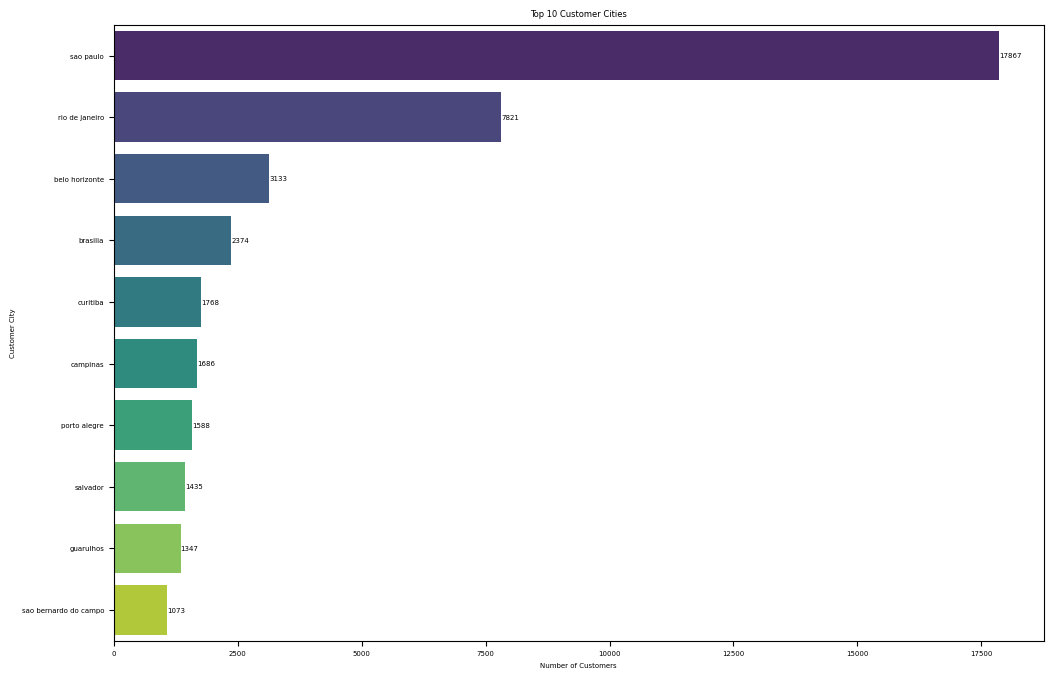

In [258]:
city = df_all['customer_city'].value_counts().head(10)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=city.values, y=city.index, palette='viridis')
for i in range(len(city)):
    plt.text(city.values[i], i, city.values[i], color='black', ha='left', va='center')
plt.title('Top 10 Customer Cities')
plt.xlabel('Number of Customers')
plt.ylabel('Customer City')
plt.show()

#### Berdasarkan Negara Bagian

/tmp/ipykernel_1740/2698545704.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=state.values, y=state.index, palette='viridis')


Text(0, 0.5, 'Customer City')

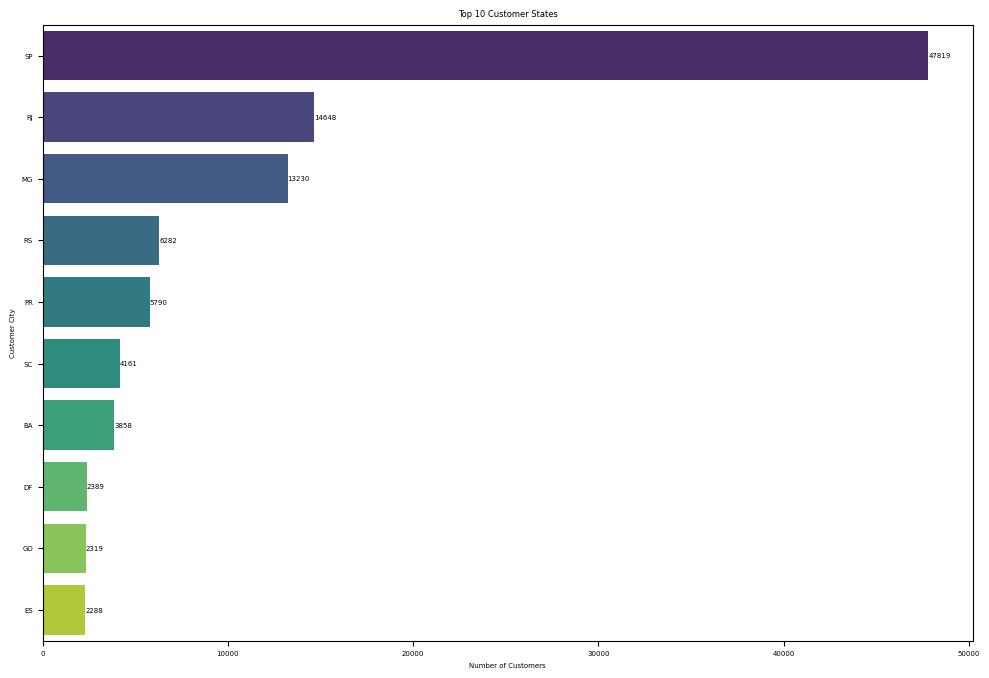

In [259]:
state = df_all['customer_state'].value_counts().head(10)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=state.values, y=state.index, palette='viridis')
for i in range(len(state)):
    plt.text(state.values[i], i, state.values[i], color='black', ha='left', va='center')
plt.title('Top 10 Customer States')
plt.xlabel('Number of Customers')
plt.ylabel('Customer City')

### Pertanyaan 2: Kategori produk apa yang paling banyak dan paling sedikit dibeli oleh customer.?

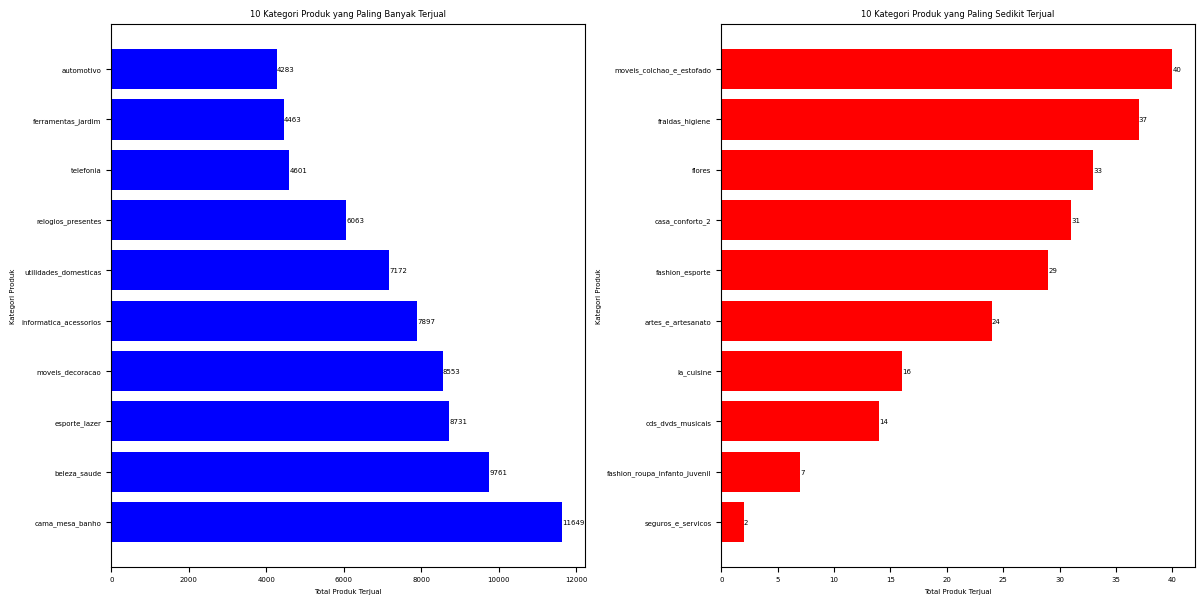

In [260]:
# Menghitung jumlah produk per kategori
kategori_counts = df_all['product_category_name'].value_counts()

# Mengambil 10 kategori produk yang paling banyak
top_10 = kategori_counts.head(10)

# Mengambil 10 kategori produk yang paling sedikit
bottom_10 = kategori_counts.tail(10).sort_values(ascending=True)

# Membuat plot untuk 10 kategori produk yang paling banyak
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Membuat 2 subplot, ini adalah subplot pertama
plt.barh(top_10.index, top_10.values, color='blue')
for i in range(len(top_10)):
    plt.text(top_10.values[i], i, top_10.values[i], color='black', ha='left', va='center')
plt.title('10 Kategori Produk yang Paling Banyak Terjual')
plt.xlabel('Total Produk Terjual')
plt.ylabel('Kategori Produk')

# Membuat plot untuk 10 kategori produk yang paling sedikit
plt.subplot(1, 2, 2)  # Ini adalah subplot kedua
plt.barh(bottom_10.index, bottom_10.values, color='red')
for i in range(len(bottom_10)):
    plt.text(bottom_10.values[i], i, bottom_10.values[i], color='black', ha='left', va='center')
plt.title('10 Kategori Produk yang Paling Sedikit Terjual')
plt.xlabel('Total Produk Terjual')
plt.ylabel('Kategori Produk')

plt.tight_layout()
plt.show()

### Pertanyaan 3: Produk apa yang paling banyak dan paling sedikit dibeli oleh customer.?

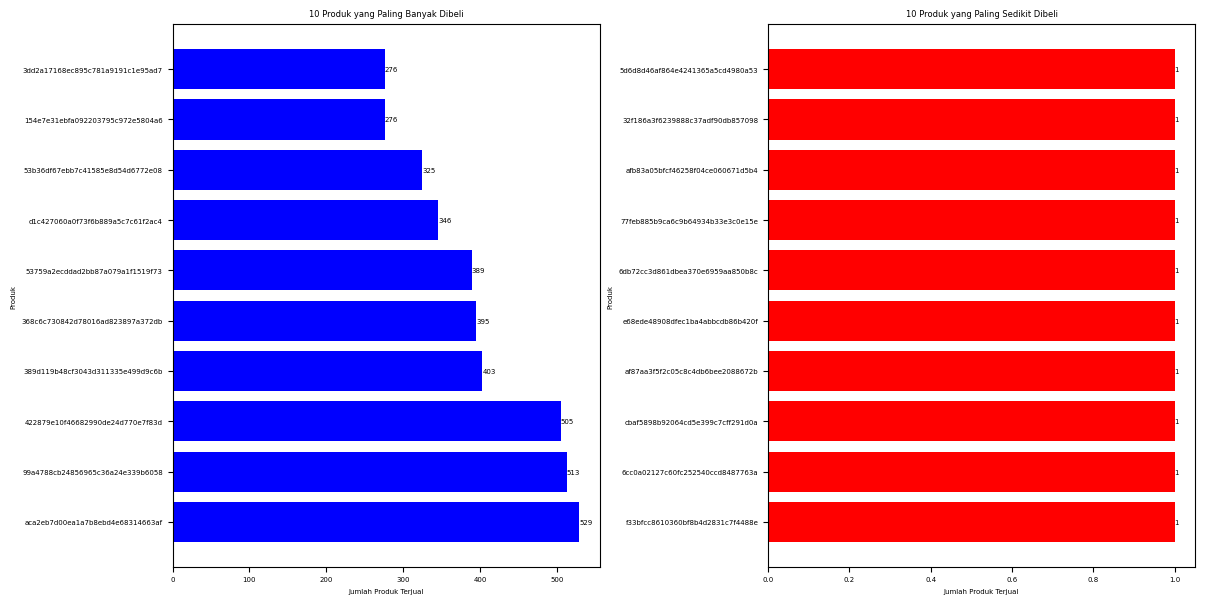

In [261]:
# Menghitung jumlah setiap produk
product_counts = df_all['product_id'].value_counts()

# Mengambil 10 produk yang paling banyak
top_10 = product_counts.head(10)

# Mengambil 10 produk yang paling sedikit
bottom_10 = product_counts.tail(10).sort_values(ascending=True)

# Membuat plot untuk 10 produk yang paling banyak
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Membuat 2 subplot, ini adalah subplot pertama
plt.barh(top_10.index, top_10.values, color='blue')
for i in range(len(top_10)):
    plt.text(top_10.values[i], i, top_10.values[i], color='black', ha='left', va='center')
plt.title('10 Produk yang Paling Banyak Dibeli')
plt.xlabel('Jumlah Produk Terjual')
plt.ylabel('Produk')

# Membuat plot untuk 10 produk yang paling sedikit
plt.subplot(1, 2, 2)  # Ini adalah subplot kedua
plt.barh(bottom_10.index, bottom_10.values, color='red')
for i in range(len(bottom_10)):
    plt.text(bottom_10.values[i], i, bottom_10.values[i], color='black', ha='left', va='center')
plt.title('10 Produk yang Paling Sedikit Dibeli')
plt.xlabel('Jumlah Produk Terjual')
plt.ylabel('Produk')

plt.tight_layout()
plt.show()

### Pertanyaan 4: Bagaimana performa dan revenue penjualan sepanjang tahun 2017.?.?

In [262]:

df_2017 = df_all[df_all['order_purchase_timestamp'].dt.year == 2017]

monthly_orders_df = df_2017.resample(rule='ME', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B') #mengubah format order date menjadi Tahun-Bulan
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)
monthly_orders_df

,order_purchase_timestamp,order_count,revenue
0,January,737,116499.95
1,February,1592,235824.38
2,March,2496,374319.44
3,April,2241,351233.79
4,May,3465,516941.05
5,June,3084,436785.79
6,July,3824,511603.82
7,August,4129,574149.64
8,September,4090,637166.45
9,October,4428,659068.15


In [263]:
df_all['order_purchase_timestamp'].describe(include="all")

count                           113367
mean     2018-01-01 14:02:09.383480064
min                2016-10-03 09:44:50
25%         2017-09-13 19:30:25.500000
50%                2018-01-20 15:44:08
75%         2018-05-05 17:34:16.500000
max                2018-08-29 15:00:37
Name: order_purchase_timestamp, dtype: object

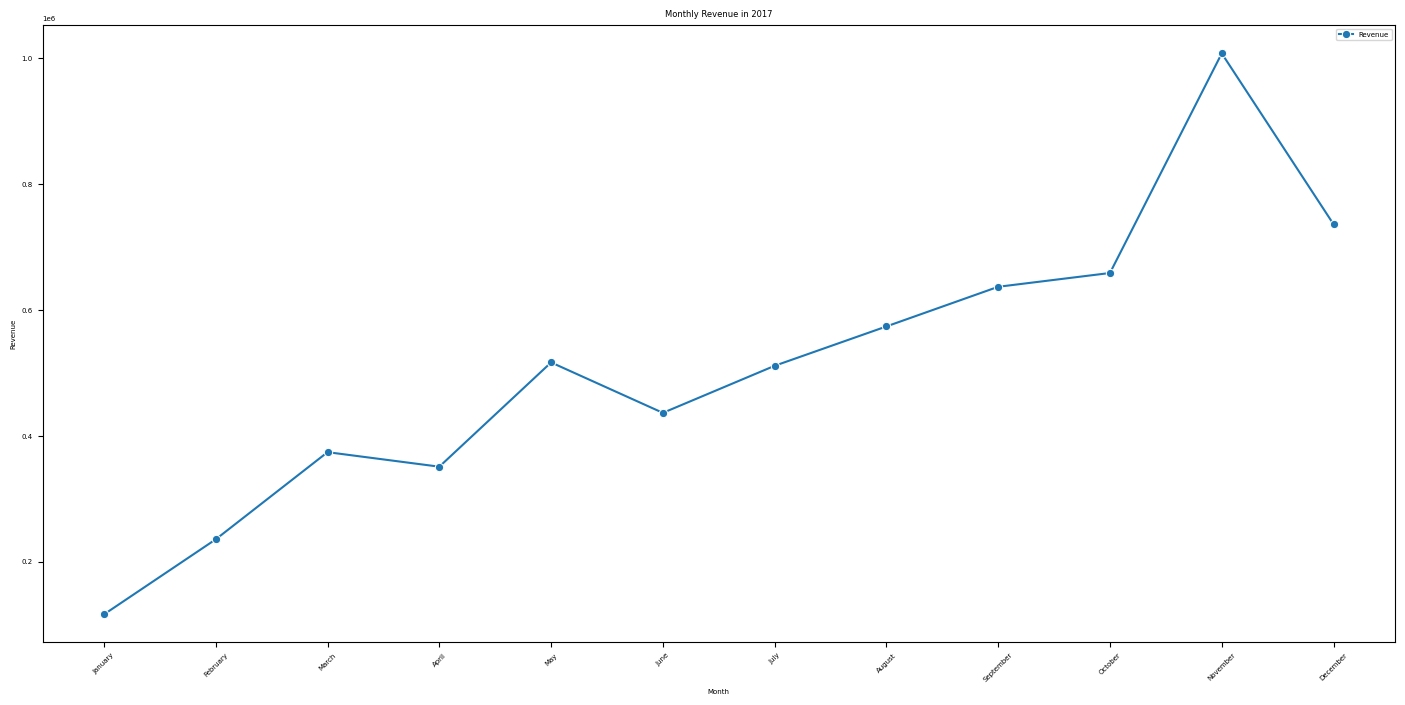

In [264]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='order_purchase_timestamp', y='revenue', data=monthly_orders_df, marker='o', label='Revenue')
plt.title('Monthly Revenue in 2017')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

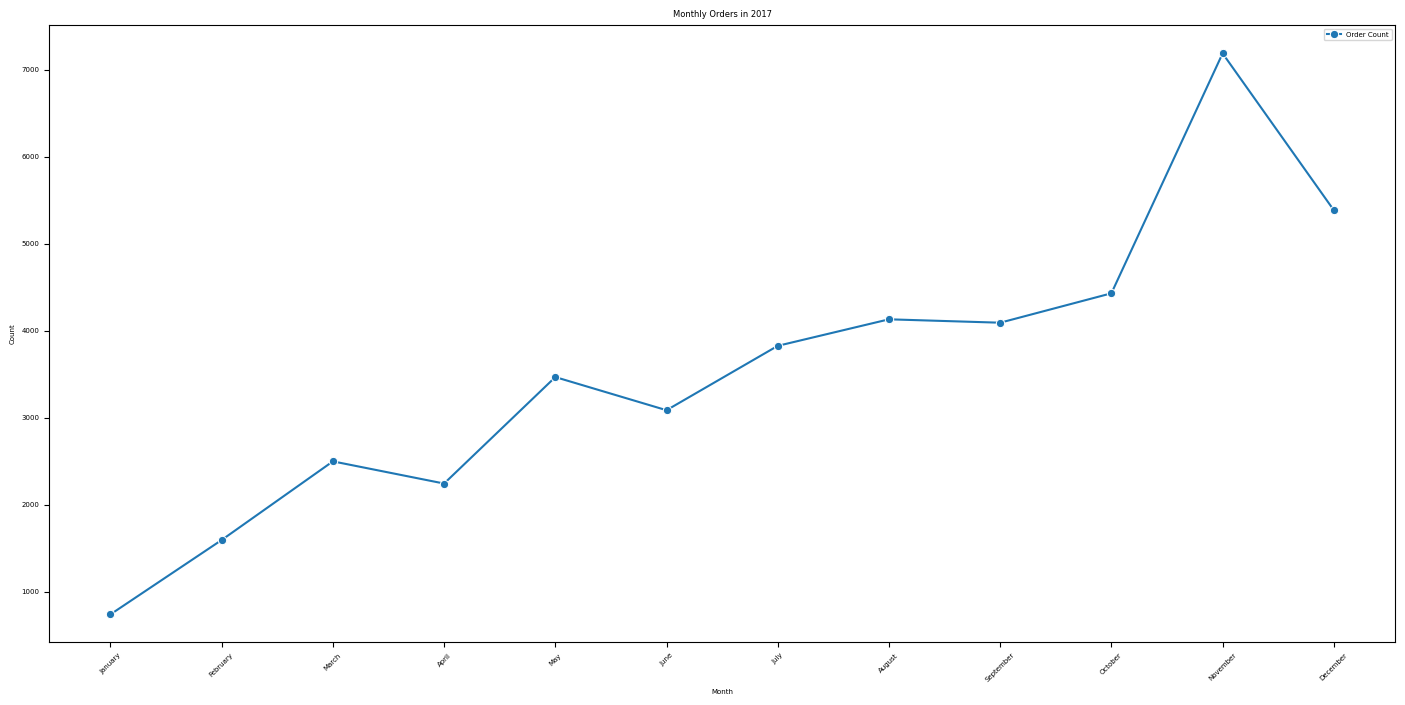

In [265]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='order_purchase_timestamp', y='order_count', data=monthly_orders_df, marker='o', label='Order Count')
plt.title('Monthly Orders in 2017')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Pertanyaan 5: Type Pembayaran apa yang paling banyak digunakan customer.?

/tmp/ipykernel_1740/588683212.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment.values, y=payment.index, palette='viridis')


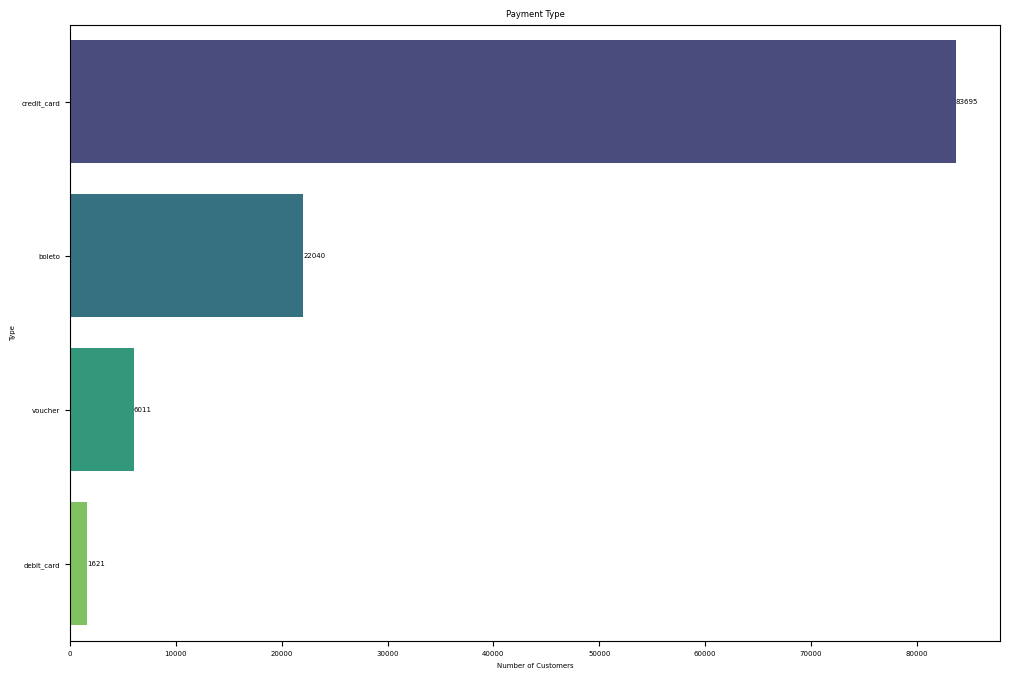

In [266]:
payment = df_all['payment_type'].value_counts()

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=payment.values, y=payment.index, palette='viridis')
for i in range(len(payment)):
    plt.text(payment.values[i], i, payment.values[i], color='black', ha='left', va='center')
plt.title('Payment Type')
plt.xlabel('Number of Customers')
plt.ylabel('Type')
plt.show()

#### Pertanyaan 6: Bagaimana status orderan dari pelanggan?

/tmp/ipykernel_1740/427811153.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_or.values, y=status_or.index, palette='viridis')


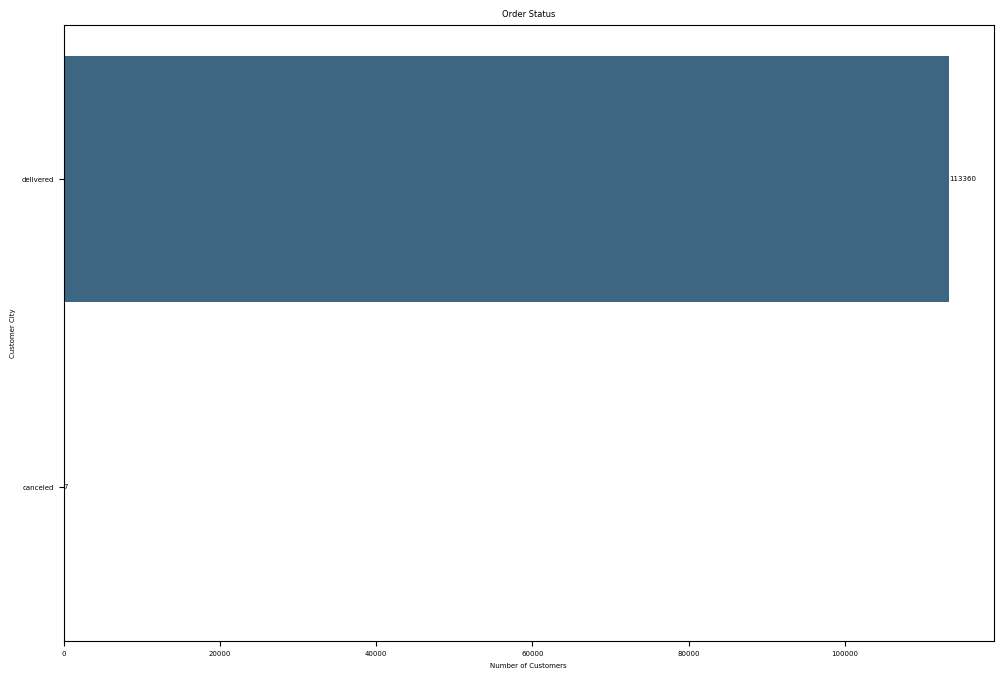

In [267]:
status_or = df_all['order_status'].value_counts()

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=status_or.values, y=status_or.index, palette='viridis')
for i in range(len(status_or)):
    plt.text(status_or.values[i], i, status_or.values[i], color='black', ha='left', va='center')
plt.title('Order Status')
plt.xlabel('Number of Customers')
plt.ylabel('Customer City')
plt.show()

**Insight:**
- Pertanyaan 1: Customer paling banyak berasal dari sao paulo pada negara bagian SP
- Pertanyaan 2: Kategri produk yang paling banyak terjual adalah cama_mesa_banho. Sedangkan kategori produk yang paling sedikit terjual adalah seguros_e_servicos
- Pertanyaan 3: Produk yang paling banyak terjual adalah aca2eb7d00ea1a7b8ebd4e68314663af. Sedangkan salah satu produk yang paling sedikit terjual adalah 6f1c4346d1a3630833ef0128e82eb6fb.
- Pertanyaan 4: Puncak tertinggi order dan nilai revenue pada 2017 terjadi pada bulan november.
- Pertanyaan 5: Metode pembayaran yang paling sering digunakan adalah menggunakan kartu kredit.
- Pertanyaan 6: Penjual dengan skor review bintang 5 terbanyak adalah seller 6560211a19b47992c3666cc44a7e94c0. Sedangkan, salah satu penjual dengan skor review bintang 5 paling sedikit adalah seller 56642bcb79900e777d68e91915cb4267.
- Pertanyaan 7: Penjual dengan jumlah skor review bintang 1 lebih banyak daripada bintang 5 adalah seller 6560211a19b47992c3666cc44a7e94c0.
- Pertanyaan 8: Status order paling banyak adalah delivered.

## Analisis Lanjutan (Opsional)

### RMF

In [268]:
rfm_df = df_all.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", #mengambil tanggal order terakhir
    "order_id": "nunique",
    "price": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df =  date(rfm_df,"max_order_timestamp")
save_data(rfm_df, "rfm_df")
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,89.80
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,179.99
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,149.90
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,93.00


In [269]:
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = df_all["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,89.80,288
1,000161a058600d5901f007fab4c27140,2017-07-16,1,54.90,409
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,179.99,547
3,0002414f95344307404f0ace7a26f1d5,2017-08-16,1,149.90,378
4,000379cdec625522490c315e70c7a9fb,2018-04-02,1,93.00,149


In [270]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288
1,000161a058600d5901f007fab4c27140,1,54.90,409
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,547
3,0002414f95344307404f0ace7a26f1d5,1,149.90,378
4,000379cdec625522490c315e70c7a9fb,1,93.00,149


/tmp/ipykernel_1740/1860136006.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=False).head(5), palette=colors, ax=ax[0])
/tmp/ipykernel_1740/1860136006.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
/tmp/ipykernel_1740/1860136006.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_valu

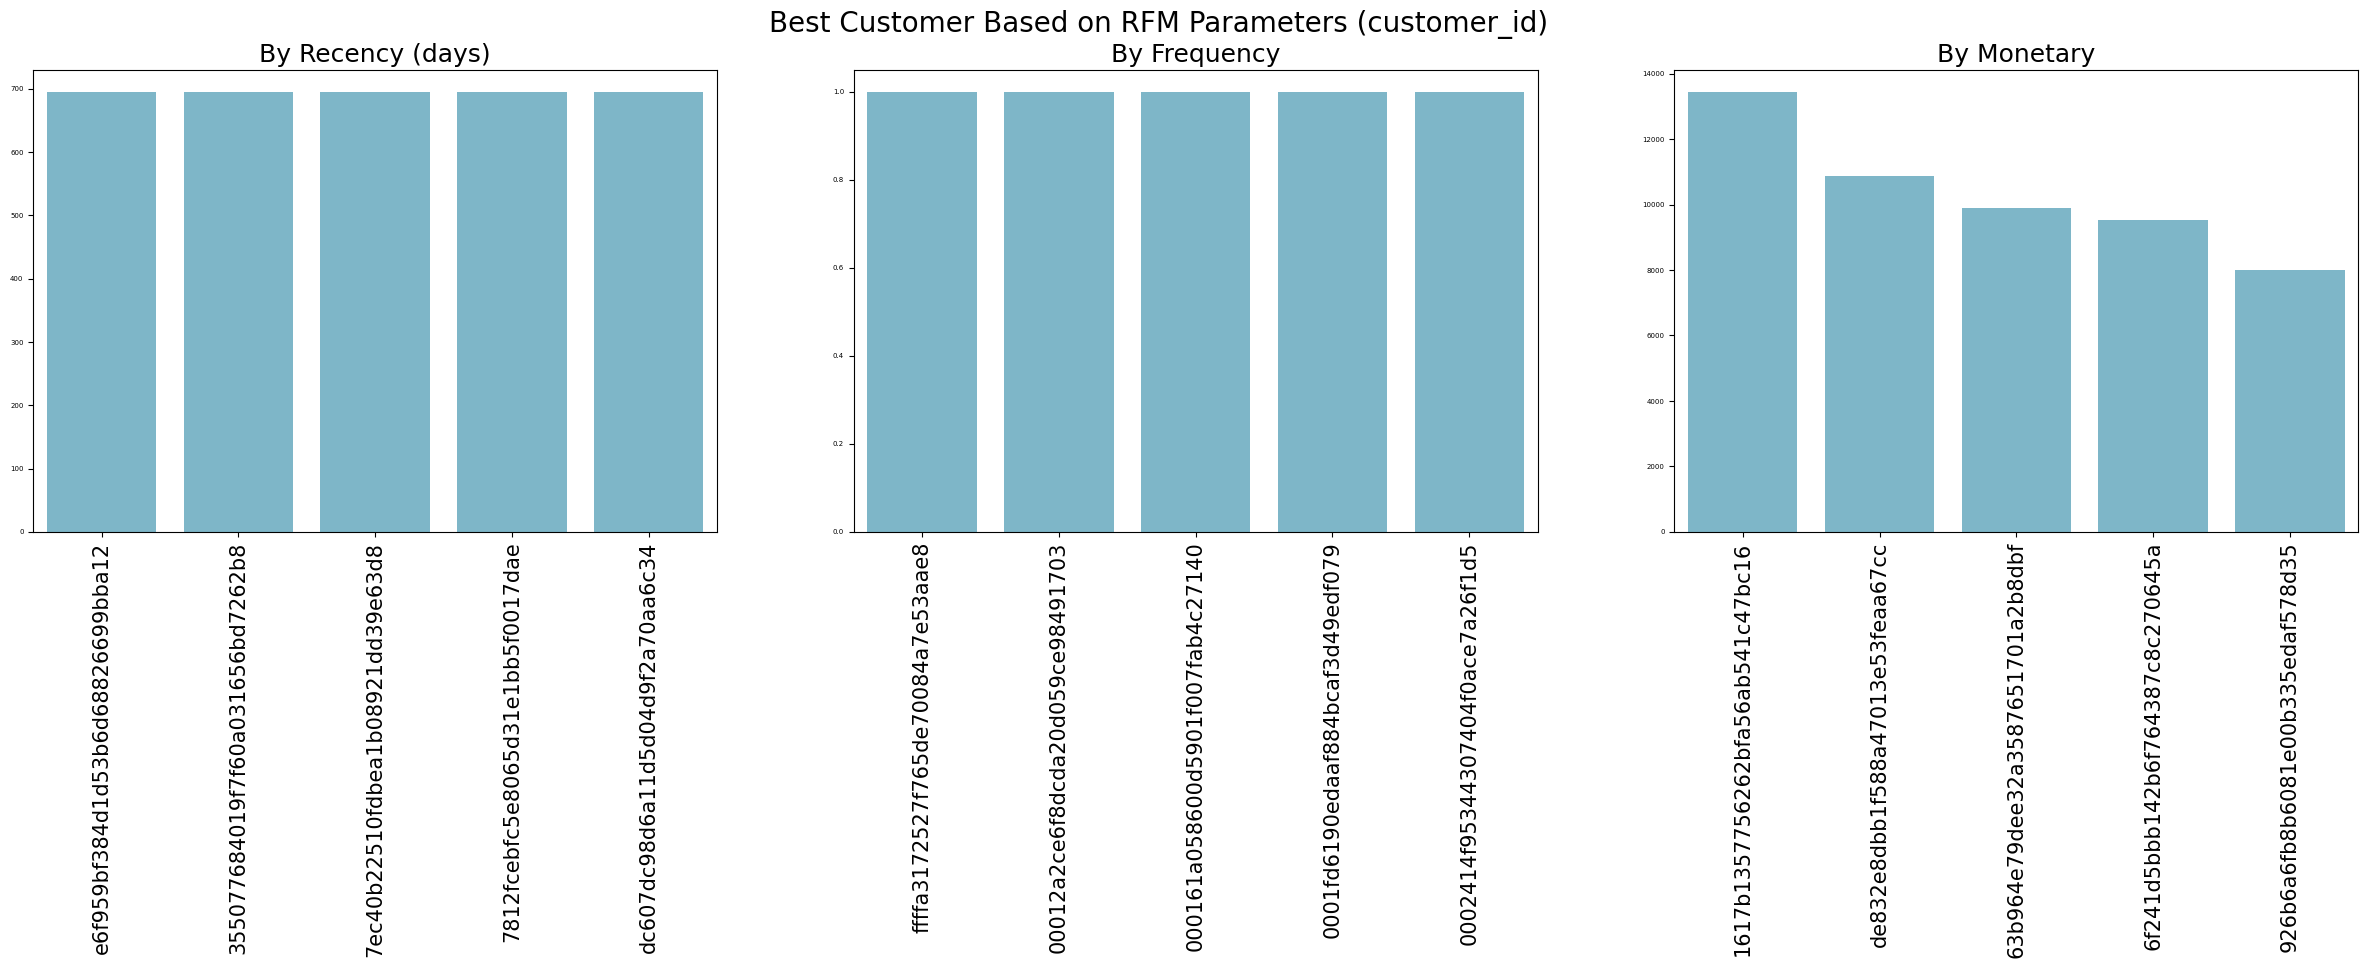

In [271]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15, rotation=90)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis ='x', labelsize=15, rotation=90)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis ='x', labelsize=15, rotation=90)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

#### Mengurutkan customer berdasarkan recency, frequency, & monetary score

In [272]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288,32393.0,47555.0,47892.5
1,000161a058600d5901f007fab4c27140,1,54.90,409,15708.5,47555.0,29520.0
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,547,2572.5,47555.0,76429.5
3,0002414f95344307404f0ace7a26f1d5,1,149.90,378,19825.5,47555.0,70155.0
4,000379cdec625522490c315e70c7a9fb,1,93.00,149,63493.5,47555.0,50240.0


In [273]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100
 
rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)
 
rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288,34.060607,100.0,50.355382
1,000161a058600d5901f007fab4c27140,1,54.90,409,16.517181,100.0,31.038072
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,547,2.704934,100.0,80.359903
3,0002414f95344307404f0ace7a26f1d5,1,149.90,378,20.846126,100.0,73.762735
4,000379cdec625522490c315e70c7a9fb,1,93.00,149,66.762176,100.0,52.823602


In [274]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,3.09
1,000161a058600d5901f007fab4c27140,2.41
2,0001fd6190edaaf884bcaf3d49edf079,3.71
3,0002414f95344307404f0ace7a26f1d5,3.66
4,000379cdec625522490c315e70c7a9fb,3.41
5,0004164d20a9e969af783496f3408652,2.49
6,000419c5494106c306a97b5635748086,2.31


#### Segmentasi customer berdasarkan RFM_score

In [275]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,3.09,Medium value customer
1,000161a058600d5901f007fab4c27140,2.41,Low value customers
2,0001fd6190edaaf884bcaf3d49edf079,3.71,Medium value customer
3,0002414f95344307404f0ace7a26f1d5,3.66,Medium value customer
4,000379cdec625522490c315e70c7a9fb,3.41,Medium value customer
5,0004164d20a9e969af783496f3408652,2.49,Low value customers
6,000419c5494106c306a97b5635748086,2.31,Low value customers
7,00046a560d407e99b969756e0b10f282,3.60,Medium value customer
8,00050bf6e01e69d5c0fd612f1bcfb69c,2.79,Low value customers
9,000598caf2ef4117407665ac33275130,4.95,Top customers


In [276]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,15458
1,Low value customers,39871
2,Medium value customer,33424
3,Top customers,5275
4,lost customers,1081


In [277]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

/tmp/ipykernel_1740/1016365800.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


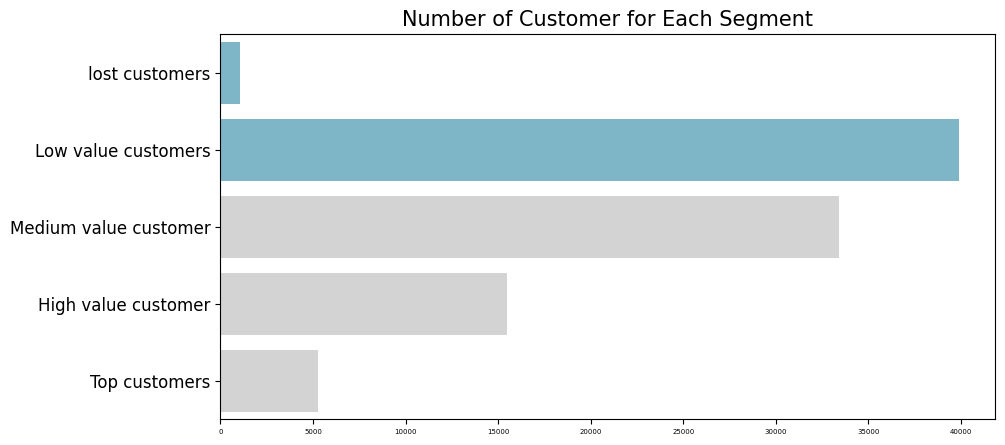

In [278]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id", 
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

#### Geospatial Analysis

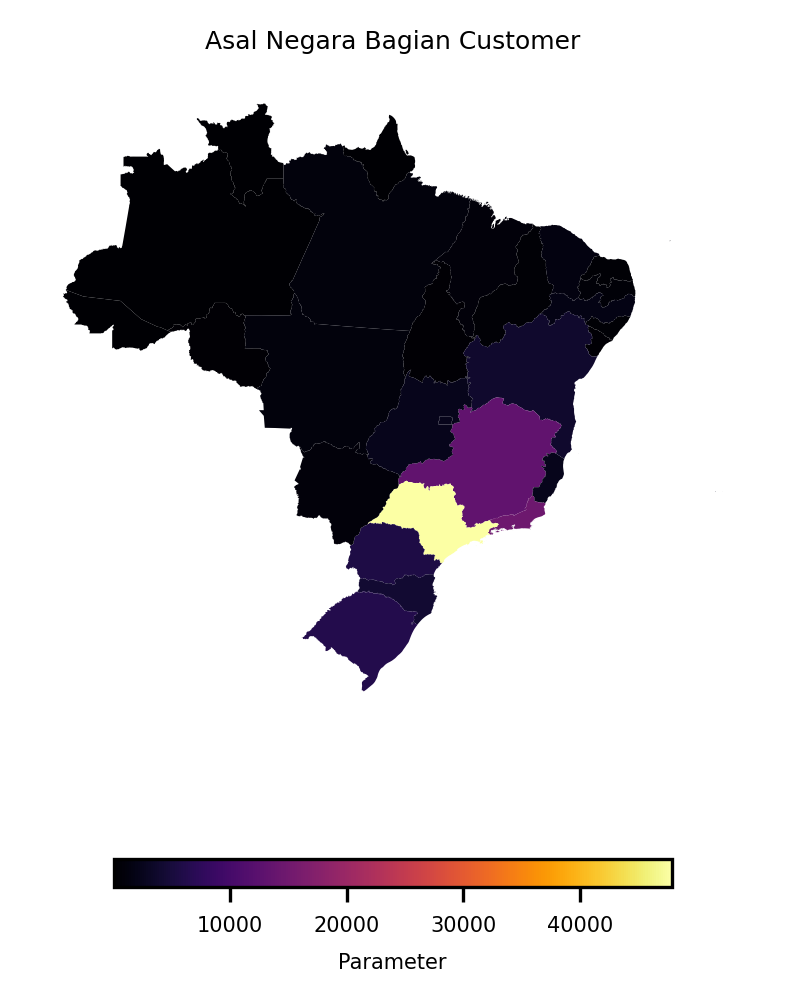

In [279]:
df_states= df_all['customer_state'].value_counts().reset_index()
df_states.columns = ['state', 'customer_count']

states = geobr.read_state(year=2019)

states["abbrev_state"] = states["abbrev_state"].str.lower()
df_states["state"] = df_states["state"].str.lower()
brasil = states.merge(df_states, how="left", left_on="abbrev_state", right_on="state")

plt.rcParams.update({"font.size": 5})
fig, ax = plt.subplots(figsize=(4, 4), dpi=300)
brasil.plot(
    column="customer_count",
    cmap="inferno",
    legend=True,
    legend_kwds={
        "label": "Parameter",
        "orientation": "horizontal",
        "shrink": 0.6,
    },
    ax=ax,
)

ax.set_title("Asal Negara Bagian Customer")
ax.axis("off")
plt.show()

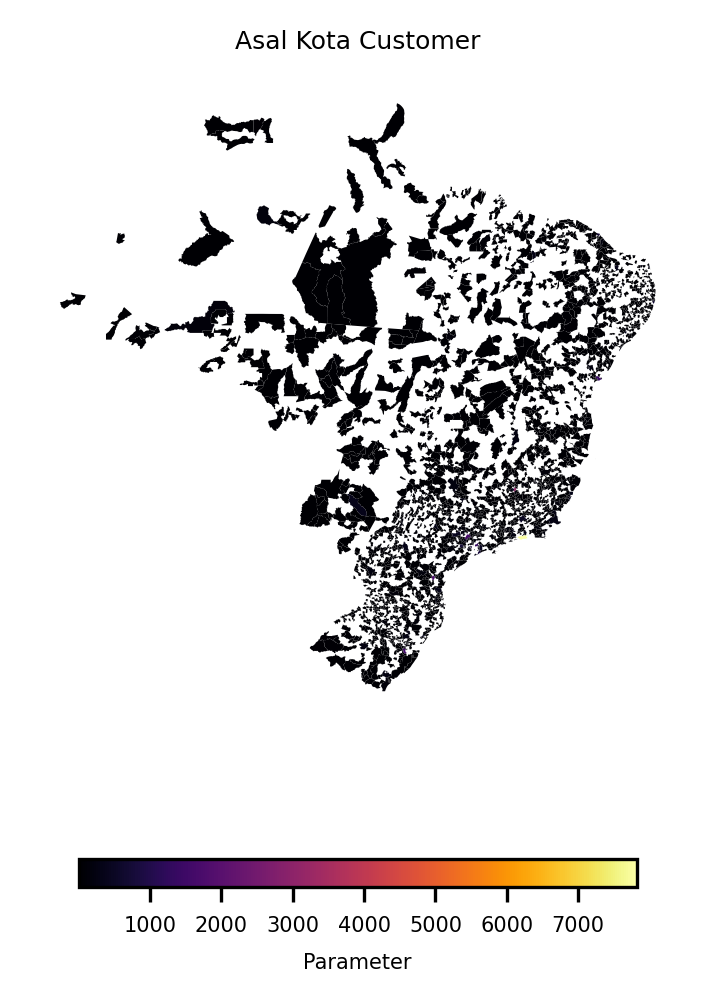

In [280]:
df_cities = df_all['customer_city'].value_counts().reset_index()
df_cities.columns = ['customer_city', 'customer_count']

all_city = geobr.read_municipality(year=2019)

all_city["name_muni"] = all_city["name_muni"].str.replace("'", '')
all_city["name_muni"] = all_city["name_muni"].str.lower()
df_cities["customer_city"] = df_cities["customer_city"].str.lower()

all_city = all_city.merge(df_cities, how="left", left_on="name_muni", right_on="customer_city")

plt.rcParams.update({"font.size": 5})

fig, ax = plt.subplots(figsize=(4, 4), dpi=300)

all_city.plot(
    column="customer_count",
    cmap="inferno",
    legend=True,
    legend_kwds={
        "label": "Parameter",
        "orientation": "horizontal",
        "shrink": 0.6,
    },
    ax=ax,
)

ax.set_title("Asal Kota Customer")
ax.axis("off")
plt.show()

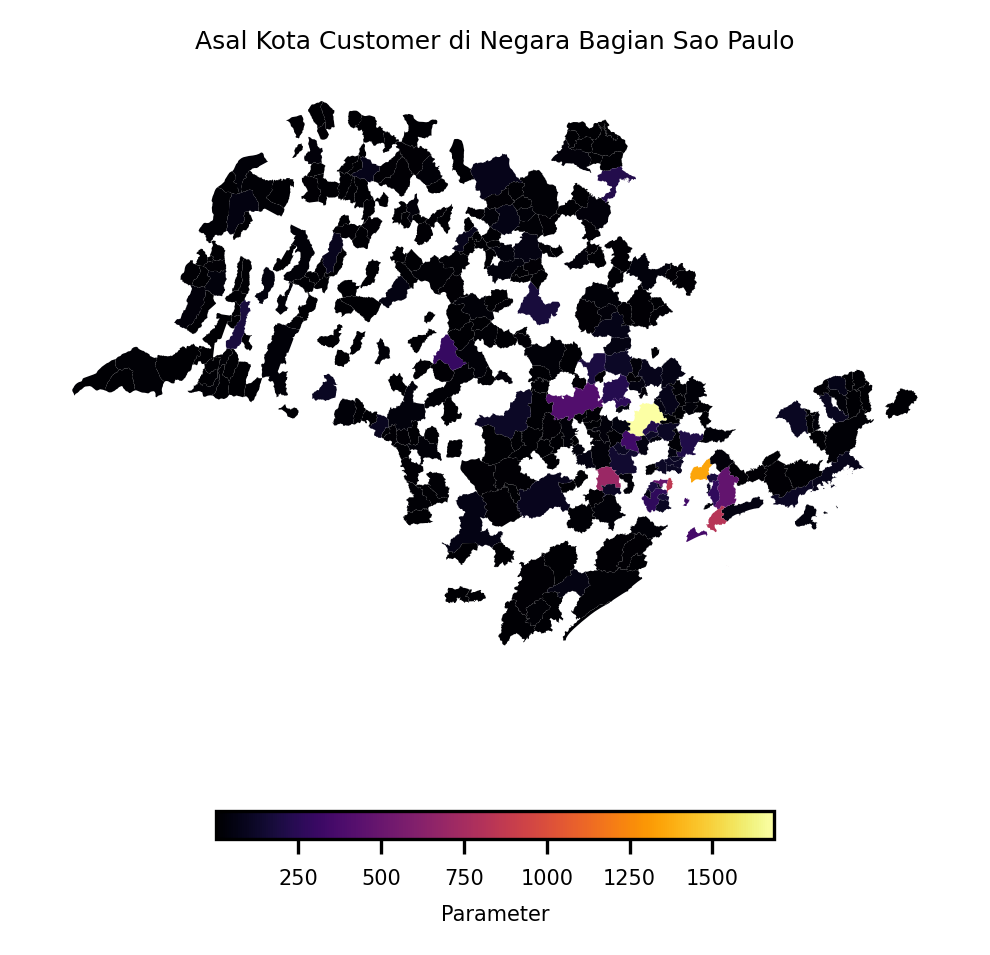

In [281]:
cities = df_all['customer_city'].value_counts().reset_index()
cities.columns = ['customer_city', 'customer_count']

sao = geobr.read_municipality(code_muni="SP", year=2019)

sao["name_muni"] = sao["name_muni"].str.replace("'", '')
sao["name_muni"] = sao["name_muni"].str.lower()
cities["customer_city"] = cities["customer_city"].str.lower()

# join the databases
sao = sao.merge(cities, how="left", left_on="name_muni", right_on="customer_city")

plt.rcParams.update({"font.size": 5})

fig, ax = plt.subplots(figsize=(4, 4), dpi=300)

sao.plot(
    column="customer_count",
    cmap="inferno",
    legend=True,
    legend_kwds={
        "label": "Parameter",
        "orientation": "horizontal",
        "shrink": 0.6,
    },
    ax=ax,
)

ax.set_title("Asal Kota Customer di Negara Bagian Sao Paulo")
ax.axis("off")
plt.show()

#### Clustering - Manual Grouping by Transaction

In [282]:
# Menghitung jumlah transaksi per pelanggan
jumlah_transaksi_per_pelanggan = df_all['customer_id'].value_counts().reset_index()
jumlah_transaksi_per_pelanggan.columns = ['customer_id', 'jumlah_transaksi']

# Tetapkan batasan atau kriteria untuk klaster
bins = [0, 5, 15, 20, 25, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High', 'Extremely High']

# Buat klaster pelanggan berdasarkan kriteria
jumlah_transaksi_per_pelanggan['klaster'] = pd.cut(jumlah_transaksi_per_pelanggan['jumlah_transaksi'], bins=bins, labels=labels)

# Tampilkan hasilnya
jumlah_transaksi_per_pelanggan

,customer_id,jumlah_transaksi,klaster
0,270c23a11d024a44c896d1894b261a83,63,Extremely High
1,13aa59158da63ba0e93ec6ac2c07aacb,38,Extremely High
2,92cd3ec6e2d643d4ebd0e3d6238f69e2,26,Extremely High
3,63b964e79dee32a3587651701a2b8dbf,24,Very High
4,6ee2f17e3b6c33d6a9557f280edd2925,24,Very High
...,...,...,...
95104,f54a9f0e6b351c431402b8461ea51999,1,Low
95105,9bdf08b4b3b52b5526ff42d37d47f222,1,Low
95106,503740e9ca751ccdda7ba28e9ab8f608,1,Low
95107,8ab97904e6daea8866dbdbc4fb7aad2c,1,Low


/tmp/ipykernel_1740/1076167471.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.values, y=df.index, palette=colors_)


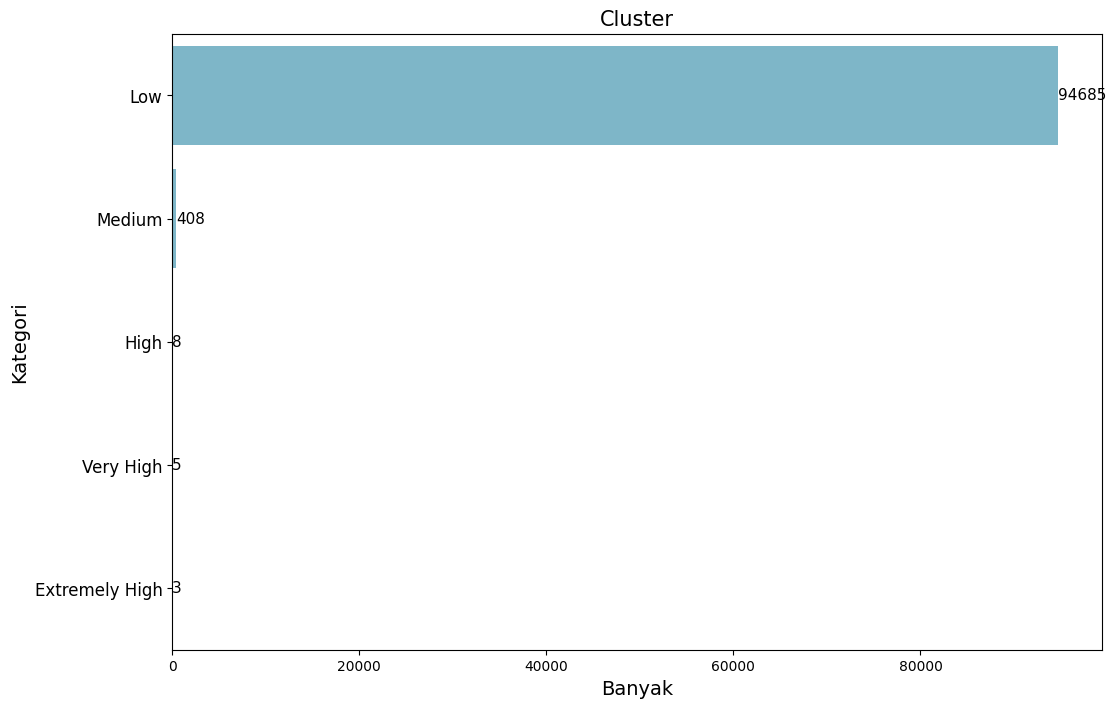

In [283]:
df = jumlah_transaksi_per_pelanggan['klaster'].value_counts()

plt.figure(figsize=(12, 8))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x=df.values, y=df.index, palette=colors_)
for i in range(len(df)):
    plt.text(df.values[i], i, df.values[i], color='black', ha='left', va='center', size=11)
plt.title('Cluster', fontsize=15)
plt.xlabel('Banyak', fontsize=14)
plt.ylabel('Kategori', fontsize=14)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=12)
plt.show()

**Insight:**
- Berdasarkan skor RMF, mayoritas customer dikategorikan sebagai Low value customers dengan jumlah mencapai 40 ribuan. Sedangkan untuk kategori Top customers berjumlah 5 ribuan.
- Berdasarkan geospatial analysis, wilayah dengan warna gelap adalah wilayah dengan jumlah sedikit. Sedangkan untuk wilayah warna cream adalah wilayah dengan customer terbanyak. Untuk wilayah warna putih menunjukkan bahwa tidak ada customer yang berasal dari wilayah tersebut.
- Meskipun negara bagian sao paulo memilki customer terbanyak, tetapi tidak semua kota terdapat customer.
- Untuk clustering dilakukan manual menggunakan jumlah transaksi yang dilakukan oleh customer.

## Conclusion

- Conclution pertanyaan 1: Berdasarkan demografi customer, negara bagian sao paulo memilki jumlah customer terbanyak, terutama di kota sao paulo. Hal tersebut menunjukkan bahwa minat belanja masyarakat di negara bagian sao paulo begitu tinggi. Campaign yang mungkin dilakukan di negara bagian tersebut cukup sukses dan berhasil menarik minat masyarakat, sehingga campaigh tersebut bisa diterapkan di kota-kota besar lainnya agar jumlah customer bisa lebih banyak. Selain itu, faktor jumlah penduduk juga memengaruhi tingginya jumlah customer di suatu wilayah.
- Conclution pertanyaan 2: Kategori produk yang paling banyak terjual adalah kategori rumah tangga yang mencapai 11 ribu produk yang terjual. Sedangkan kategori produk yang sedikit terjual adalah layanan asuransi. Hal tersebut menunjukkan bahwa minat customer untuk mengikuti asuransi begitu rendah, sehingga layanan asuransi bisa dioptimalkan lebih baik lagi agar bisa menarik customer yang lebih banyak.
- Conclution pertanyaan 3: Produk dengan penjualan tertinggi adalah produk aca2eb7d00ea1a7b8ebd4e68314663af, menunjukkan bahwa minat masyarakat begitu tinggi terhadap produk tersebut. Sedangkan masyarakat kurang minat terhadap salah satu produk seperti produk 6f1c4346d1a3630833ef0128e82eb6fb.
- Conclution pertanyaan 4: Nilai revenue dan order pada tahun 2017 cenderung mengalami kenaikan, puncaknya terjadi pada bulan november. Hal tersebut menunjukkan bahwa bisnis tersebut mengalami pertumbuhan dari waktu ke waktu.
- Conclution pertanyaan 5: Minat customer terhadap pembayaran menggunakan kartu kredit sangat banyak. Hal tersebut menunjukkan bahwa manfaat kartu kredit sangat menarik banyak customer atau masyarakat. 
- Conclution pertanyaan 6: Status pesanan mayoritas sudah terkirim ke customer. Status cancel mungkin bisa terjadi karena pembatalan yang dilakukan oleh customer itu sendiri atau bisa terjadi karena pengembalian barang yang rusak atau tidak sesuai.

## Simpan library 

In [284]:
installed_packages = {pkg.key for pkg in pkg_resources.working_set}

# Menyimpan nama library beserta versi yang digunakan ke file requirements.txt
with open('/home/riyan/LaskarAi/Belajar Data Analisis Dengan Python/submission/requirements.txt', 'w') as f:
    for package in sorted(installed_packages):
        version = pkg_resources.get_distribution(package).version
        f.write(f"{package}=={version}\n")